### *Import necessary libraries for data manipulation, preprocessing, modeling, and evaluation*


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    classification_report, 
    confusion_matrix, 
    ConfusionMatrixDisplay,
    roc_curve, 
    auc,
    RocCurveDisplay
)


### *Loading the diabetes dataset and display basic information about the dataset*
#### *The dataset is assumed to be preprocessed and saved in CSV format*

In [2]:
file_path = 'balanced_diabetes.csv'   
data = pd.read_csv(file_path)

# Separate features and target variable
X = data.drop(columns=['Outcome'])
y = data['Outcome']


imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)


scaler = StandardScaler()
X = scaler.fit_transform(X)



### *Spliting the dataset into features (X) and target variable (y)*
#### *Performing train-test split with stratification and standardize the feature data*


In [3]:
# Split the data into training (75%) and testing (25%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


### *Defining the Support Vector Machine (SVM) Classifier and Setting Up the Hyperparameter Grid*
#### *Using GridSearchCV to Find the Best Combination of Hyperparameters*

In [4]:

# Define the SVM classifier
svm = SVC(random_state=42, probability=True)

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

#  Grid Search for hyperparameter tuning
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [5]:
# Get the best model
best_svm = grid_search.best_estimator_
print(best_svm)
# Make predictions using them
y_pred = best_svm.predict(X_test)
y_pred_proba = best_svm.predict_proba(X_test)[:, 1]


SVC(C=1, probability=True, random_state=42)


### *Evaluating the best SVM model on the test set*
#### *Generating test accuracy, classification report.*

In [6]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Test Accuracy: 0.8823529411764706
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       115
           1       0.87      0.90      0.89       123

    accuracy                           0.88       238
   macro avg       0.88      0.88      0.88       238
weighted avg       0.88      0.88      0.88       238



#### *Visualizing the confusion matrix using a heatmap*

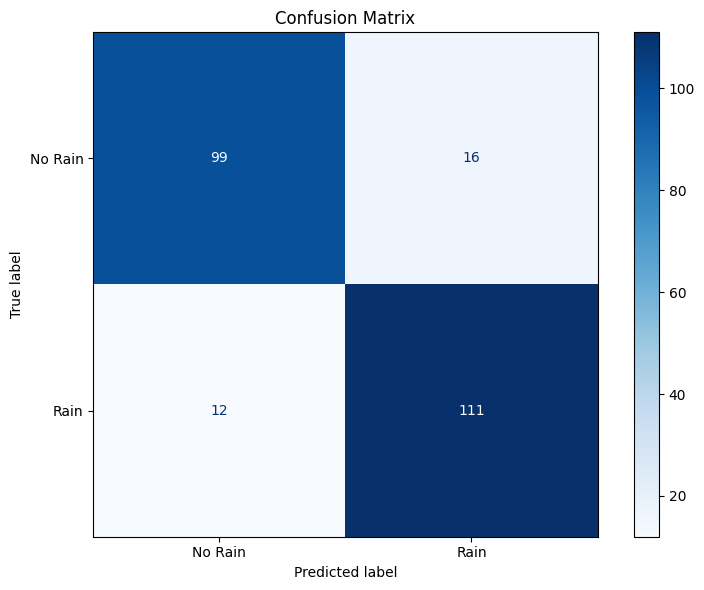

In [7]:

fig, ax = plt.subplots(figsize=(8, 6))

cm_display = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, y_pred),
    display_labels=['No Rain', 'Rain']
)

cm_display.plot(ax=ax, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

#### *Ploting ROC Curve*

AUC Score: 0.907


<Figure size 800x600 with 0 Axes>

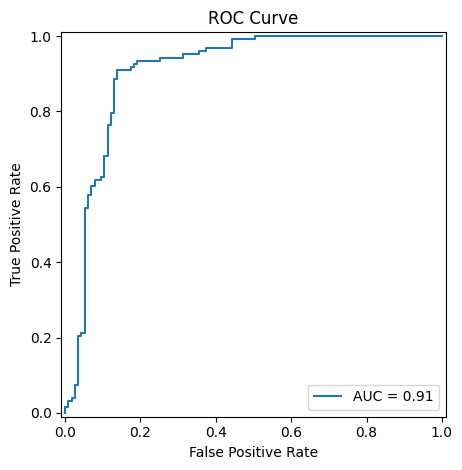

In [8]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = auc(fpr, tpr)

plt.figure(figsize=(8, 6))

RocCurveDisplay(
    fpr=fpr, 
    tpr=tpr, 
    roc_auc=auc_score
).plot()


plt.title('ROC Curve')
plt.tight_layout()
print(f"AUC Score: {auc_score:.3f}")
plt.show()